-------------------------------------------------------------

<font size="6"> Monitor My Lockdown Using Seismic Vibration </font>

-------------------------------------------------------------

### Project Website : http://monitormylockdown.com/

-------------------------------------------------------------


#### By Artash Nath

#### Co-Founder, https://hotpoprobot.com/

#### Twitter https://twitter.com/wonrobot

-------------------------------------------------------------

-------------------------------------

## Part 1 : Downloading Updated Data From Seismic Stations

-------------------------------------

This First Notebook will walk you through the steps of using the ObsPy Library to download the MSEED (Mini Standard for the Exchange of Earthquake Data) files for the choosen city over the specified date range. This NoteBook can be re-run everytime you would like to update to the most recent (yesterday's) data.

-------------------------------------

In [1]:
# If you have not already, install the required libraries for this code.


# For mathematical operations on our data
!pip install numpy  

# Track the time-progress of some steps in the code as Some parts may take a considerable amount of time
!pip install tqdm   

# To Download the MSEED Seismic Files from the data source (https://www.iris.edu/)
!pip install obspy  


In [2]:
DATA_STORAGE_PATH = r'E:\DATA'

-------------------------------------
## 1. Import Required Libararies
-------------------------------------

In [3]:
# Importing Required Libraries

import datetime # To iterate and manage the dates we want to download our data over
import os # Help with file directories
import csv # Writing CSV files to temporarily store some Data
import matplotlib.pyplot as plt # Displaying Graphs
import matplotlib.ticker as ticker

#Data Handling
import numpy as np
import pandas as pd
import csv

#Obspy is a Python libary to help download and process seismic data
from obspy import UTCDateTime, read
from obspy.clients.fdsn import Client

# To break data into different frequencies
from scipy import signal

# Track program progress
from tqdm.notebook import tqdm
import threading

# Warnings can be annoying- you can remove them with the following peice of code
import warnings
warnings.filterwarnings("ignore")

-------------------------------------
## 2. Defining Stations Information
-------------------------------------

In [4]:
# Study Period - From Jan 2019 to Yesterday
start = UTCDateTime("2019-12-01")  
end = UTCDateTime("2021-2-4") # This can be changed to at most yesterday's date

# Computing List of Dates To Analyze
datelist = pd.date_range(start.datetime, end.datetime, freq="D")



# Station Information that stays the same no matter what station you pick
location = "--" 
channel = "HHZ"
data_provider = "IRIS"
c = Client(data_provider)

stations = ['TORO'] # This is the station name for the "Toronto" station, you can add as many stations as you want
networks = ['WU'] # Simmilarely, this is TORO's Network Name, you must add the network for each station

# (The process for looking up your prefered City Station and Network is explained at the end of the notebook)

# Note : If you would like to speed up the process with multiple cities simoultaniously
# You can copy this notebook and run them simoultaniously with different stations
# Instead of adding multiple stations to the list and going through them sequentially in 1 notebook

-------------------------------------
## 3. Downloading Data From Stations
-------------------------------------

In [5]:
# This Function takes the Station Name, Station Network, and Directory to store the data
def download_station_data(STATION, NETWORK):
    DIR = os.path.join(DATA_STORAGE_PATH, STATION)
    print("RUNNING TASK ", STATION, NETWORK)
    for day in tqdm(datelist):
        fn = day.strftime(STATION + "-%Y-%m-%d.mseed")
        fn = os.path.join(DIR, fn)
        if day != datelist[-1] and os.path.isfile(fn):
            continue
        else:
            st = c.get_waveforms(NETWORK, STATION, location, channel, UTCDateTime(day)-1801, UTCDateTime(day)+86400+1801, attach_response=True)
            st = st.resample(100) # Resampling all data to 100 Hz, --> 100 readings per second
            # Continously merging data from each day into 1 main data stream
            st.merge(method=0, fill_value='latest')
            st.write(fn)

In [6]:
for station, network in zip(stations, networks):
    download_station_data(station, network),

RUNNING TASK  TORO WU


-------------------------------------------------------------------------------------------------------------
# The Data for the Stations Have Succesfully Been Downloaded!
-------------------------------------------------------------------------------------------------------------

If the above code ran without any problems, you should see a Folder in the "DATA_STORAGE_PATH" titled "TORO", or whatever station you substituted for it. Inside the folder you should see several hundred MSEED files (each contain the data for a seperate day)

Seismic Data is quite heavy because of the high sample rate, so the folder will take up at least 30 GB of space.

You can now proceed to the next notebook : "2. Analyze the Seismic Data" to analyze this data


-------------------------------------------------------------------------------------------------------------


## Finding Other Cities Station and Network Information

This same process can be applied to any IRIS stations in the world.

The only 3 parameters you need to know about a station is : network, station, and channel. The location parameter is always "--".

To find these parameters for your local IRIS station, first visit https://www.iris.edu/app/station_monitor/

Then, enter your city into the search bar, and select the prefered station:

(replace Toronto with your prefered city)

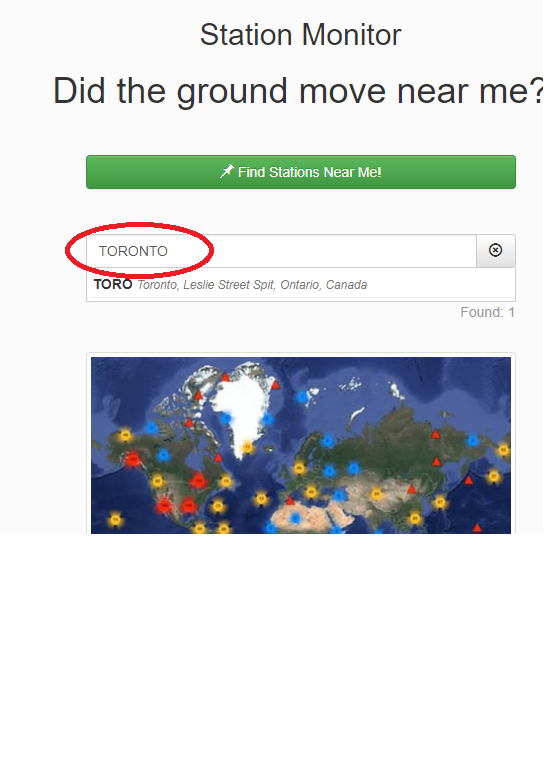

The website should then load live data from that station.

At the top of the page, you should see a title indicating information about the station.

You should something that looks like TORO_WU in that sentence.

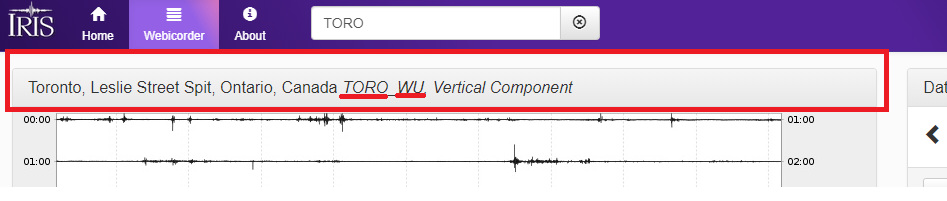

The word before the "_" is the Station Name, in this case : "TORO"

The 2 letters after that represent the network name, which here is "WU"

Finally, to find the channel, scroll down to the bottom right section of the page. There will be a box called Advanced Features. In the bottom part of that box, there should be text showing something simmilar to:
    
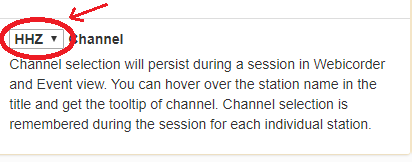

The box where the arrow is pointing is the channel name, which here is "HHZ"

Once you have all 3 parameters, you are good to go! To run this notebook with data from that city, replace the values in the lists at the start of the notebook with the new parameters